# Importe librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from seaborn import heatmap
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Funciones 

## Entrenamiento

In [2]:
def entrenamiento_and_report_simple(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

In [3]:
def entrenamiento_and_report_red_neuronal(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

## Optimizacion de parametros

In [4]:
def Optimizacion_parametros(param_grid,Modelo,data_entrenamiento,objetivo,cv):
    grid_search = GridSearchCV(Modelo, param_grid, cv=cv,
                           scoring='precision', 
                           return_train_score=True)
    grid_search.fit(data_entrenamiento, objetivo)
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a['mean_train_score'] = grid_search.cv_results_['mean_train_score']
    a['mean_test_score'] = grid_search.cv_results_['mean_test_score']
    a['std_train_score'] = grid_search.cv_results_['std_train_score']
    a['std_test_score'] = grid_search.cv_results_['std_test_score']
    print('Mejor resultado' +''+ str(grid_search.best_score_)  )     
    print('Mejor parametro' +''+ str(grid_search.best_estimator_)) 
    minv = grid_search.best_score_
    return a, a[(a.mean_test_score == minv)],grid_search.best_estimator_,grid_search.best_score_



# Funcion PCA

In [5]:
def PCA_conversion(datos,Numero_parametros, nombre_variable):
    scaler=StandardScaler()#normalizamos los datos
    scaler.fit(datos) # calculo la media para poder hacer la transformacion
    X_scaled=scaler.transform(datos)# Ahora si, escalo los datos y los normalizo
    pca=PCA(n_components=Numero_parametros) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
    pca.fit(X_scaled) # obtener los componentes principales
    ear2_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PC
    
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    print('suma:',sum(expl[0:5]))
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    
    print('suma:',sum(expl[0:1000]))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    
    x = range(1, Numero_parametros + 1)
    new_columns = []
    for n in x:
        name = 'nombre_variable' +  str(n)
        new_columns.append(name)

    bm = pd.DataFrame(data = ear2_pca, columns = new_columns)
    bm.index = np.arange(1,len(bm)+1)
    return bm

## Carga de datos

In [6]:
path_dataset = 'archive/thumbNail.csv'
ear = pd.read_csv(path_dataset)
ear = ear.iloc[1:]
y = ear['has_DM2']
path_dataset = 'archive/thumbNailData.csv'
ear2 = pd.read_csv(path_dataset)
ear2= (ear2.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(ear2.shape[1])], axis=1))
ear2= ear2.apply(pd.to_numeric, errors='coerce')

In [7]:
ear2

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.992,Q1.993,Q1.994,Q1.995,Q1.996,Q1.997,Q1.998,Q1.999,Q1.1000,Q1.1001
0,1.677736,1.669674,1.606302,1.496170,1.463465,1.614183,1.735656,1.606203,1.468621,1.533758,...,1.605564,1.645869,1.541921,1.197973,0.937006,0.932809,1.227277,1.563040,1.642934,1.652746
1,0.235689,0.240345,0.292589,0.386042,0.436600,0.389936,0.338474,0.325031,0.309292,0.287488,...,0.161836,0.016110,-0.011179,0.203094,0.413085,0.608225,0.504505,0.278435,0.374016,0.393350
2,0.168231,0.114523,0.113897,0.157141,0.178047,0.147686,0.117067,0.130889,0.142806,0.132925,...,0.459647,0.379738,0.126242,0.080256,0.101409,0.265919,0.427977,0.528234,0.102636,-0.061460
3,-0.704767,-0.762771,-0.778928,-0.761571,-0.750068,-0.751793,-0.743217,-0.716970,-0.685486,-0.677061,...,-0.347216,-0.267086,-0.316296,-0.331078,-0.269639,-0.016180,-0.121840,-0.362882,-0.220088,-0.169237
4,-0.338623,-0.359667,-0.363924,-0.354695,-0.351301,-0.361765,-0.369353,-0.385928,-0.398118,-0.392057,...,-0.218462,-0.251049,-0.085131,-0.007146,0.031783,-0.009119,-0.027721,-0.033101,-0.132912,-0.079910
5,-1.171388,-1.292579,-1.385461,-1.458947,-1.448328,-1.235063,-1.026185,-1.235088,-1.422003,-1.379832,...,-1.851578,-1.818759,-1.620034,-1.915608,-1.983379,-1.438491,-1.546496,-1.896045,-1.750341,-1.664888
6,-0.668255,-0.685612,-0.659782,-0.597857,-0.569529,-0.619162,-0.659048,-0.627802,-0.592392,-0.603603,...,-0.775673,-0.821618,-0.786735,-0.434924,-0.285694,-0.713130,-0.682220,-0.434849,-0.639346,-0.696834
7,-1.216443,-1.108641,-1.079212,-1.114174,-1.153317,-1.207615,-1.244404,-1.197124,-1.141274,-1.145944,...,-0.957545,-0.831606,-1.027120,-1.007134,-1.029398,-1.237292,-1.203088,-1.032953,-0.824892,-0.735110
8,-0.789861,-0.643684,-0.577171,-0.574563,-0.592840,-0.663770,-0.718660,-0.613208,-0.507510,-0.553606,...,-0.295628,-0.362499,-0.509178,-0.591534,-0.695087,-0.901480,-0.737247,-0.427174,-0.519488,-0.617319
9,0.159050,0.136424,0.138859,0.162151,0.163463,0.112148,0.062059,0.087291,0.110434,0.140871,...,0.090557,0.061886,-0.065913,0.098013,0.255765,0.372738,0.330697,0.217208,0.200165,0.151868


# Optimizacion de modelo

## XGBClassifier

In [8]:
from xgboost import XGBClassifier

In [9]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [10]:
XGBClassifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [11]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,XGBClassifier,ear2,y,5)

[21:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [12]:
best_score

0.9333333333333332

In [13]:
best_stimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
total_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.00,0.933333,0.000,0.133333
1,3,3,0.45,0.400000,0.225,0.200000
2,3,5,0.00,0.000000,0.000,0.000000
3,5,1,1.00,0.933333,0.000,0.133333
4,5,3,0.45,0.400000,0.225,0.200000
5,5,5,0.00,0.000000,0.000,0.000000
6,7,1,1.00,0.933333,0.000,0.133333
7,7,3,0.45,0.400000,0.225,0.200000
8,7,5,0.00,0.000000,0.000,0.000000
9,9,1,1.00,0.933333,0.000,0.133333


In [15]:
mejores_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.0,0.933333,0.0,0.133333
3,5,1,1.0,0.933333,0.0,0.133333
6,7,1,1.0,0.933333,0.0,0.133333
9,9,1,1.0,0.933333,0.0,0.133333


## Adabost

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [17]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [18]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [19]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,ada_clf,ear2,y,5)

Mejor resultado0.9333333333333332
Mejor parametroAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)


In [20]:
best_score

0.9333333333333332

In [21]:
best_stimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

In [22]:
total_parametros

,base_estimator__max_depth,base_estimator__min_samples_leaf,learning_rate,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,2,5,0.01,10,1.00,0.933333,0.000,0.133333
1,2,5,0.01,50,1.00,0.933333,0.000,0.133333
2,2,5,0.01,250,1.00,0.933333,0.000,0.133333
3,2,5,0.01,1000,1.00,0.933333,0.000,0.133333
4,2,5,0.10,10,1.00,0.933333,0.000,0.133333
...,...,...,...,...,...,...,...,...
75,10,10,0.01,1000,0.45,0.400000,0.225,0.200000
76,10,10,0.10,10,0.45,0.400000,0.225,0.200000
77,10,10,0.10,50,0.45,0.400000,0.225,0.200000
78,10,10,0.10,250,0.45,0.400000,0.225,0.200000


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}

In [25]:
RandomForestClassifier = RandomForestClassifier()

In [26]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,RandomForestClassifier,ear2,y,5)

Mejor resultado0.9333333333333332
Mejor parametroRandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)


In [27]:
best_score

0.9333333333333332

In [28]:
best_stimator

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [29]:
total_parametros

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,True,10,auto,2,2,200,1.0,0.933333,0.0,0.133333
1,True,10,auto,2,2,400,1.0,0.933333,0.0,0.133333
2,True,10,auto,2,2,600,1.0,0.933333,0.0,0.133333
3,True,10,auto,2,2,800,1.0,0.933333,0.0,0.133333
4,True,10,auto,2,5,200,1.0,0.933333,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...
123,False,20,sqrt,4,2,800,1.0,0.933333,0.0,0.133333
124,False,20,sqrt,4,5,200,1.0,0.933333,0.0,0.133333
125,False,20,sqrt,4,5,400,1.0,0.933333,0.0,0.133333
126,False,20,sqrt,4,5,600,1.0,0.933333,0.0,0.133333


## SVM

In [30]:
from sklearn.svm import SVC

In [31]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [32]:
svc = SVC()

In [33]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,svc,ear2,y,5)

Mejor resultado0.9333333333333332
Mejor parametroSVC(C=1, gamma=0.001)


In [34]:
best_score

0.9333333333333332

In [35]:
best_stimator

SVC(C=1, gamma=0.001)

In [36]:
total_parametros

,C,gamma,kernel,mean_train_score,mean_test_score,std_train_score,std_test_score
0,1,0.0010,rbf,1.0,0.933333,0.0,0.133333
1,1,0.0001,rbf,1.0,0.933333,0.0,0.133333
2,10,0.0010,rbf,1.0,0.933333,0.0,0.133333
3,10,0.0001,rbf,1.0,0.933333,0.0,0.133333
4,100,0.0010,rbf,1.0,0.933333,0.0,0.133333
5,100,0.0001,rbf,1.0,0.933333,0.0,0.133333
6,1000,0.0010,rbf,1.0,0.933333,0.0,0.133333
7,1000,0.0001,rbf,1.0,0.933333,0.0,0.133333
8,1,NaN,linear,1.0,0.933333,0.0,0.133333
9,10,NaN,linear,1.0,0.933333,0.0,0.133333


# Creacion de modelos

## XGBClassifier 

In [37]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Adabost

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

## SVM

In [40]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.0001)

## Red neuronal

In [41]:
from keras.models import Sequential
from keras import layers

max_features = ear2.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16032     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


# Spectograma despues del Filtro vancouver

In [42]:
path_dataset = 'archive/thumbNailData.csv'
eardata = pd.read_csv(path_dataset)
eardata= (eardata.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(eardata.shape[1])], axis=1))
eardata= eardata.apply(pd.to_numeric, errors='coerce')

## XGBClassifier 

[21:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

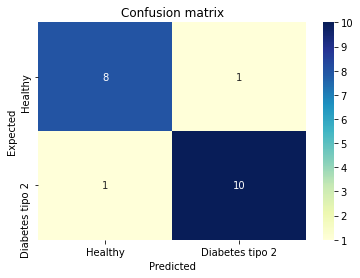

<Figure size 432x288 with 0 Axes>

In [43]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



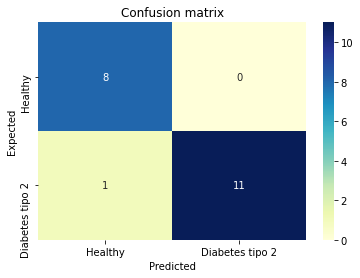

<Figure size 432x288 with 0 Axes>

In [44]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



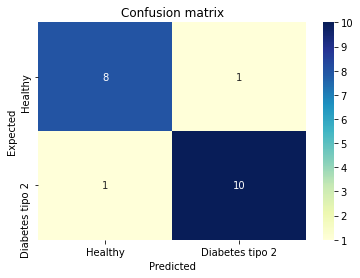

<Figure size 432x288 with 0 Axes>

In [45]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



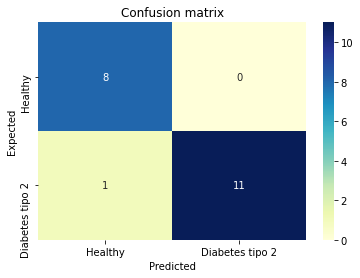

<Figure size 432x288 with 0 Axes>

In [46]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



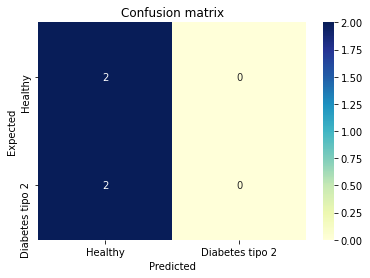

<Figure size 432x288 with 0 Axes>

In [47]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

In [48]:
y_test

1     1.0
18    0.0
16    0.0
2     1.0
Name: has_DM2, dtype: float64

# Spectograma despues del Filtro vancouver con PCA

shape of X_pca (20, 5)
[9.94717700e-01 2.29358147e-03 7.16875638e-04 3.28976147e-04
 2.65193249e-04]
suma: 0.9983223265232373
shape of X_pca (20, 5)
[9.94717700e-01 2.29358147e-03 7.16875638e-04 3.28976147e-04
 2.65193249e-04]
suma: 0.9983223265232373


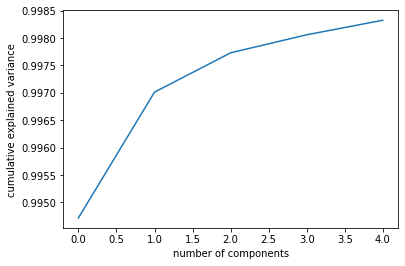

In [49]:
eardata = PCA_conversion(eardata,5,"thumbNail")

## XGBClassifier

[21:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

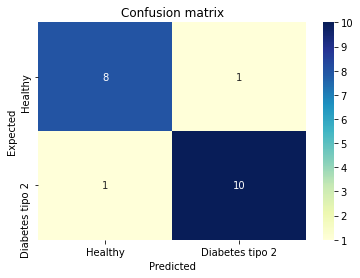

<Figure size 432x288 with 0 Axes>

In [50]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



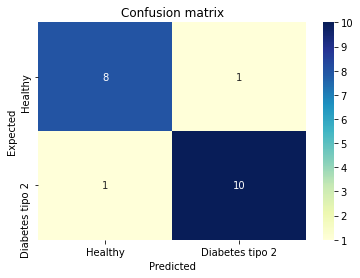

<Figure size 432x288 with 0 Axes>

In [51]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89         9
         1.0       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



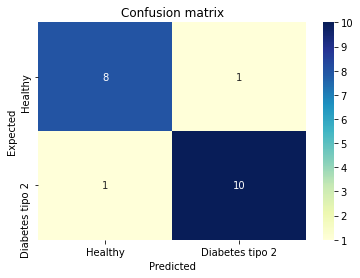

<Figure size 432x288 with 0 Axes>

In [52]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



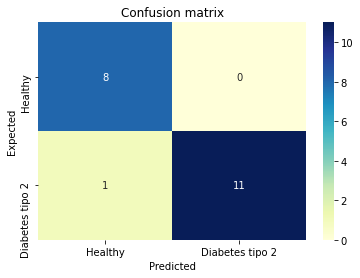

<Figure size 432x288 with 0 Axes>

In [53]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



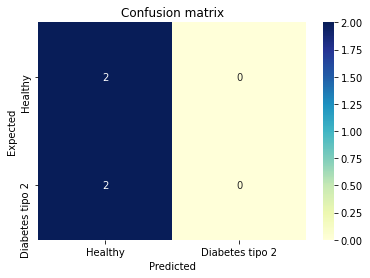

<Figure size 432x288 with 0 Axes>

In [54]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver

In [55]:
path_dataset = 'archive/thumbNail.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)

## XGBClassifier

[21:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

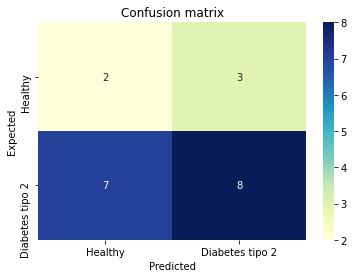

<Figure size 432x288 with 0 Axes>

In [56]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44         9
         1.0       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



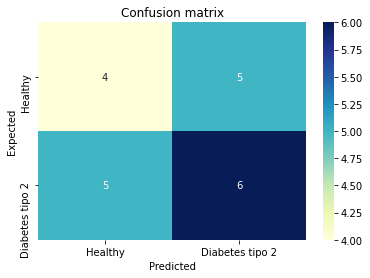

<Figure size 432x288 with 0 Axes>

In [57]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.22      0.33      0.27         6
         1.0       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



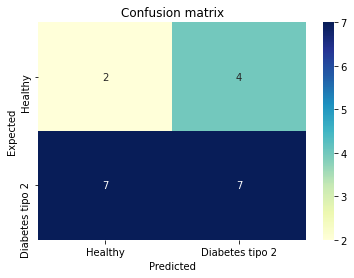

<Figure size 432x288 with 0 Axes>

In [58]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



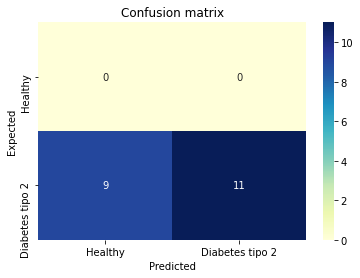

<Figure size 432x288 with 0 Axes>

In [59]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                50576     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 50,865
Trainable params: 50,865
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



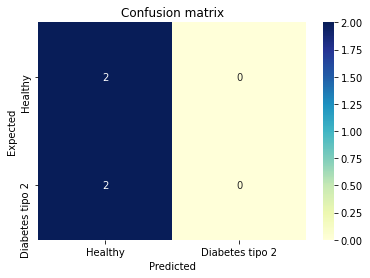

<Figure size 432x288 with 0 Axes>

In [60]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver con PCA

shape of X_pca (20, 5)
[0.83775836 0.11097886 0.00935474 0.00653265 0.00480287]
suma: 0.9694274840228274
shape of X_pca (20, 5)
[0.83775836 0.11097886 0.00935474 0.00653265 0.00480287]
suma: 0.9694274840228274


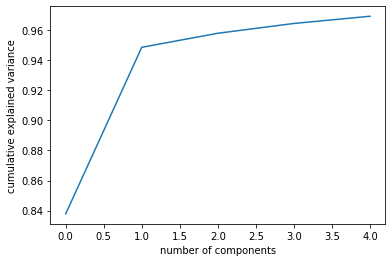

In [61]:
eardata = PCA_conversion(eardata,5,"thumbNail")

## XGBClassifier

[21:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

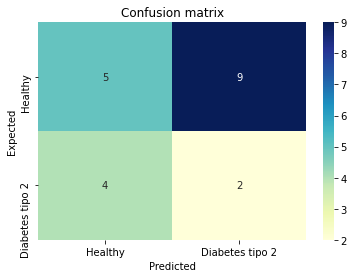

<Figure size 432x288 with 0 Axes>

In [62]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         9
         1.0       0.45      0.45      0.45        11

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



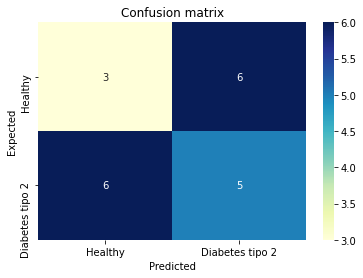

<Figure size 432x288 with 0 Axes>

In [63]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         9
         1.0       0.45      0.45      0.45        11

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



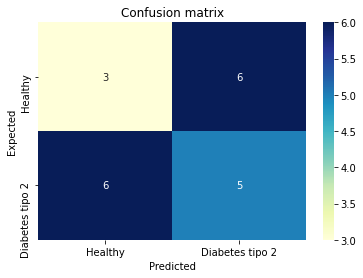

<Figure size 432x288 with 0 Axes>

In [64]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.25      0.15         4
         1.0       0.73      0.50      0.59        16

    accuracy                           0.45        20
   macro avg       0.42      0.38      0.37        20
weighted avg       0.60      0.45      0.50        20



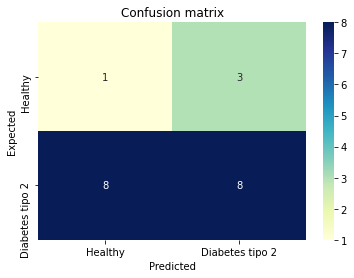

<Figure size 432x288 with 0 Axes>

In [65]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



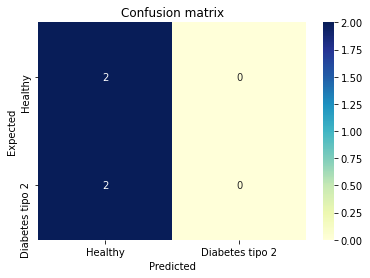

<Figure size 432x288 with 0 Axes>

In [66]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver  

In [67]:
path_dataset = 'archive/thumbNail.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)
eardata = eardata.iloc[: , 800:]
eardata = eardata.iloc[: , :1000]

## XGBClassifier

[21:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

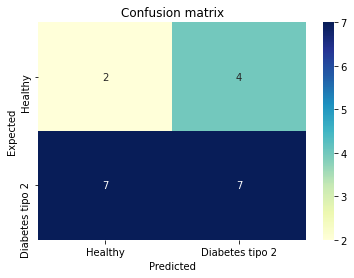

<Figure size 432x288 with 0 Axes>

In [68]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.43      0.38         7
         1.0       0.64      0.54      0.58        13

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.53      0.50      0.51        20



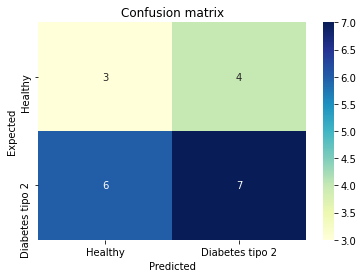

<Figure size 432x288 with 0 Axes>

In [69]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.20      0.14         5
         1.0       0.64      0.47      0.54        15

    accuracy                           0.40        20
   macro avg       0.37      0.33      0.34        20
weighted avg       0.51      0.40      0.44        20



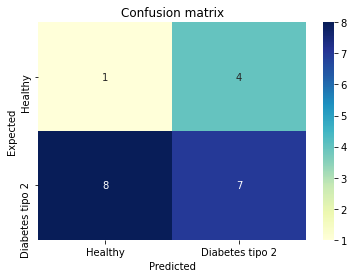

<Figure size 432x288 with 0 Axes>

In [70]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.25      0.15         4
         1.0       0.73      0.50      0.59        16

    accuracy                           0.45        20
   macro avg       0.42      0.38      0.37        20
weighted avg       0.60      0.45      0.50        20



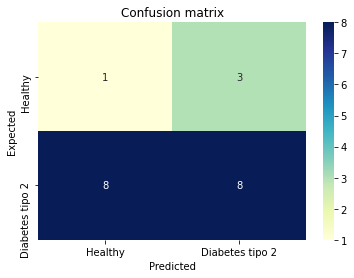

<Figure size 432x288 with 0 Axes>

In [71]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



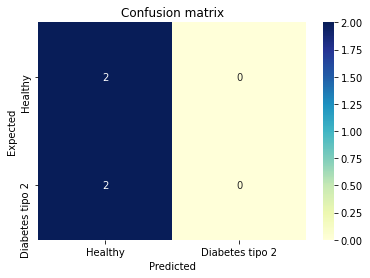

<Figure size 432x288 with 0 Axes>

In [72]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver   con PCA

shape of X_pca (20, 5)
[0.96982081 0.01329064 0.00391548 0.00182688 0.00150615]
suma: 0.9903599698618932
shape of X_pca (20, 5)
[0.96982081 0.01329064 0.00391548 0.00182688 0.00150615]
suma: 0.9903599698618932


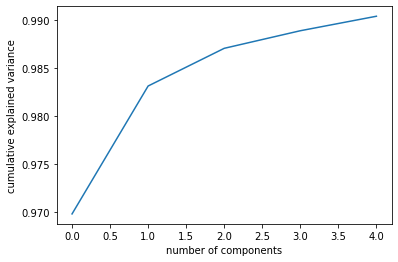

In [73]:
eardata = PCA_conversion(eardata,5,"thumbNail")

## XGBClassifier

[21:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

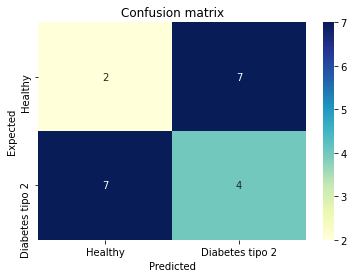

<Figure size 432x288 with 0 Axes>

In [74]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.36      0.40        11
         1.0       0.36      0.44      0.40         9

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.41      0.40      0.40        20



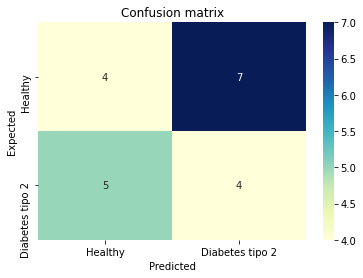

<Figure size 432x288 with 0 Axes>

In [75]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.38      0.35         8
         1.0       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



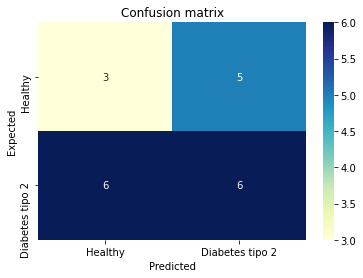

<Figure size 432x288 with 0 Axes>

In [76]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.11      0.25      0.15         4
         1.0       0.73      0.50      0.59        16

    accuracy                           0.45        20
   macro avg       0.42      0.38      0.37        20
weighted avg       0.60      0.45      0.50        20



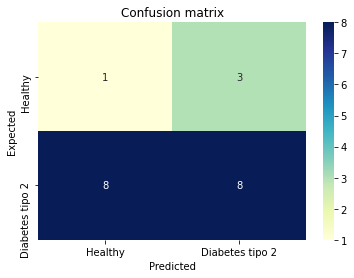

<Figure size 432x288 with 0 Axes>

In [77]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



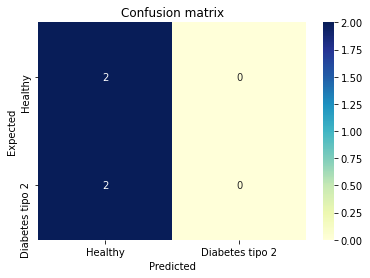

<Figure size 432x288 with 0 Axes>

In [78]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")